In [1]:
from google.colab import drive as drive
# drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
#!rm -rf /content/COVID19_Pneumonia_Normal_Chest_Xray_PA # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Brain-Stroke-CT-Image-Dataset.git

/content
Cloning into 'Brain-Stroke-CT-Image-Dataset'...
remote: Enumerating objects: 2510, done.
remote: Total 2510 (delta 0), reused 0 (delta 0), pack-reused 2510
Receiving objects: 100% (2510/2510), 59.84 MiB | 32.33 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Brain-Stroke-CT-Image-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  # local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: Normal, Số tệp: 1551
-Thư mục: Stroke, Số tệp: 950


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset


In [7]:
# Set the path to your dataset
dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/sample'
# dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset'

Class Normal


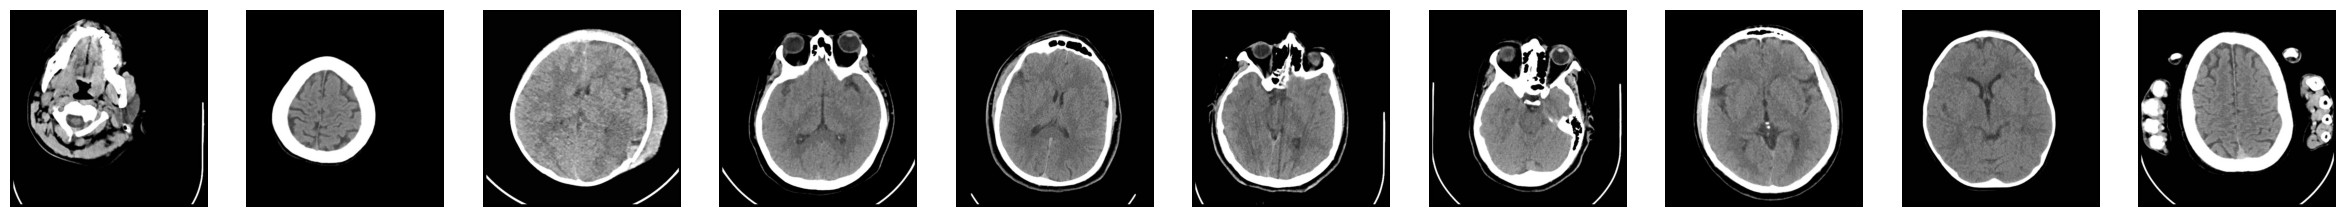

Class Stroke


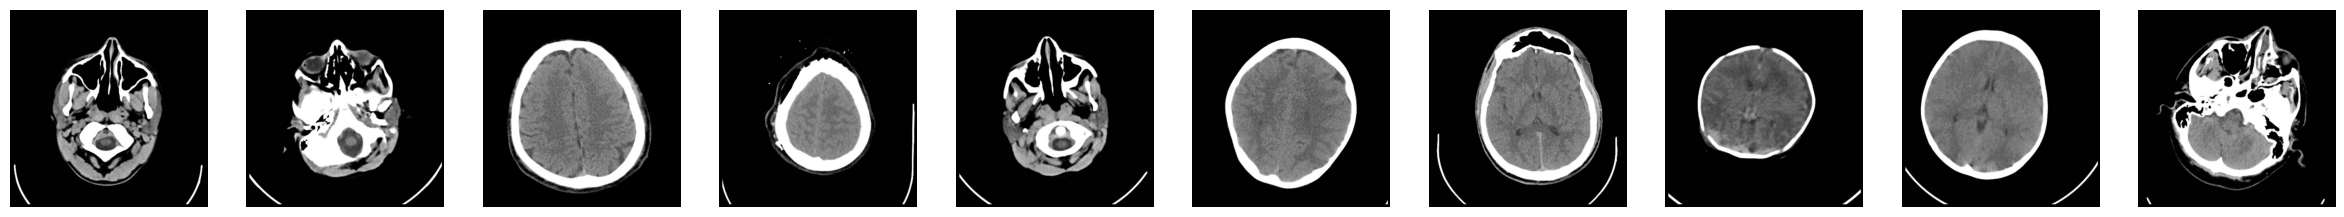

In [8]:
class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Brain-Stroke-CT-Image-Dataset/dataset')
imshow(images, 10)


In [9]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/Brain-Stroke-CT-Image-Dataset/dataset/Stroke/58 (1).jpg"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['Normal', 'Stroke'])
Image Format: JPEG
Image Mode: L
Image Size: (650, 650) pixels (Width: 650, Height: 650)
Image Colors: [(38967, 0), (220081, 1), (7416, 2), (4017, 3), (2683, 4), (1832, 5), (1253, 6), (963, 7), (800, 8), (732, 9), (662, 10), (609, 11), (553, 12), (532, 13), (523, 14), (488, 15), (497, 16), (497, 17), (518, 18), (494, 19), (490, 20), (477, 21), (439, 22), (439, 23), (475, 24), (488, 25), (472, 26), (453, 27), (463, 28), (447, 29), (443, 30), (424, 31), (419, 32), (417, 33), (402, 34), (437, 35), (391, 36), (374, 37), (397, 38), (377, 39), (376, 40), (397, 41), (386, 42), (386, 43), (374, 44), (359, 45), (408, 46), (371, 47), (363, 48), (371, 49), (390, 50), (360, 51), (381, 52), (433, 53), (390, 54), (380, 55), (389, 56), (401, 57), (405, 58), (378, 59), (387, 60), (411, 61), (401, 62), (353, 63), (391, 64), (409, 65), (424, 66), (380, 67), (387, 68), (410, 69), (389, 70), (399, 71), (375, 72), (418, 73), (386, 74), (371, 75), (416, 76), (376

## DWT

In [10]:
# Define your preprocessing function here
def preprocess_func(image):
    # Áp dụng biến đổi sóng 2D
    coeffs = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs

    # Giảm nhiễu ở mức HH, LH, HL
    denoised_HH = pywt.threshold(HH, 0.5, mode='soft')
    denoised_LH = pywt.threshold(LH, 0.5, mode='soft')
    denoised_HL = pywt.threshold(HL, 0.5, mode='soft')
    thresh = np.std(LL)
    LL = pywt.threshold(LL, thresh)


    # Tạo lại ảnh từ các hệ số đã được xử lý
    coeffs = (LL, (denoised_LH, denoised_HL, denoised_HH))
    denoised_image = pywt.idwt2(coeffs, 'bior1.3')

    return denoised_image


In [11]:
import os
import cv2
import numpy as np
from shutil import copyfile
import pywt
def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, os.path.join(dest_dir, item), preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                # Define the output file path
                filename_with_ext = os.path.basename(src_item_path)
                filename, extension = os.path.splitext(filename_with_ext)
                dest_item_path = os.path.join(dest_dir, filename + '.jpg')

                # Check if output file already exists
                if not os.path.exists(dest_item_path):
                    img = cv2.imread(src_item_path)
                    if img is not None:
                        img = preprocess_func(img)

                        # Export the preprocessed image to the output folder
                        cv2.imwrite(dest_item_path, img)



# Sử dụng
dataset_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Stroke-CT-Image-Dataset/09_03DWT'
preprocess_and_copy(dataset_path, output_path, preprocess_func)


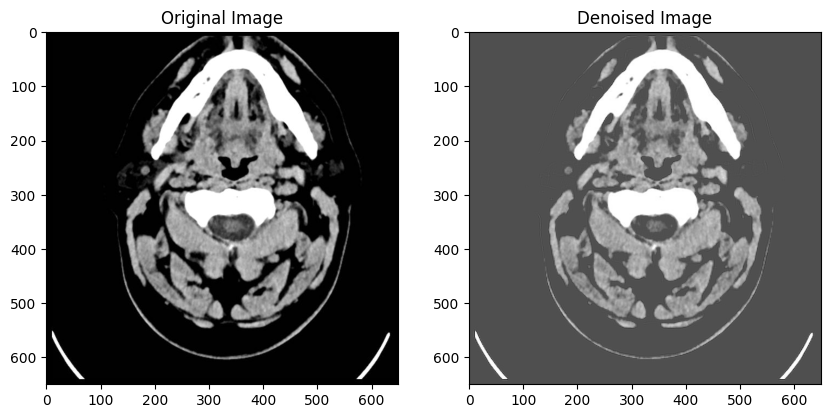

In [13]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/Brain-Stroke-CT-Image-Dataset/dataset/Stroke/58 (1).jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = preprocess_func(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()
